# [DEMO] Kalman smoothers

Testing and comparing fixed-interval and fixed-lag Kalman smoothers.

In [147]:
using LinearAlgebra
using Distributions
using ProgressMeter
using Random
using Plots
pyplot();

In [148]:
include("../gen_data.jl");
include("../fixedinterval-kalman-smoothers.jl");
include("../fixedlag-kalman-smoothers.jl");

#### Generate data

In [149]:
# Time horizon
T = 60

# Dimensionalities
Dx = 2
Dy = 1

# Time step
Δt = 0.01

# Experimental parameters
A = [1. Δt;
     0  1.]
C = [1. 0]

# Noises
qc = 1.0
Q = [Δt^2*qc 0.;0. Δt*qc]
R = 0.001

# Start state
x0 = (zeros(2,), Matrix{Float64}(I,Dx,Dx))

# Generate signal
observations, states = LGDS(A,C,Q,R,x0[1], T=T);

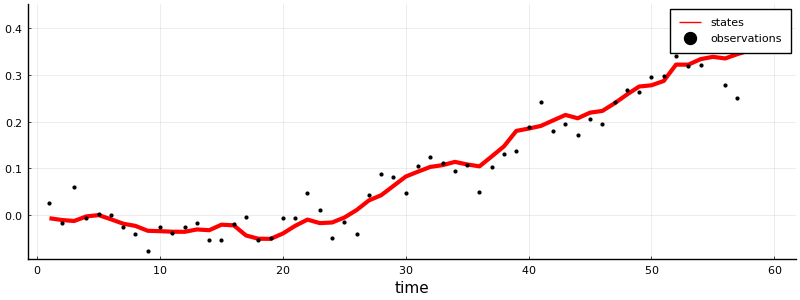

In [150]:
# Check signal visually
plot(1:T, states[1,:], linewidth=3, color="red", label="states", xlabel="time", size=(800,300))
scatter!(1:T, observations, markersize=2, color="black", label="observations")

### Inference

In [159]:
# Fixed-lag Rauch-Tung-Striebel smoother
mk,Pk = fixedlag_rts_smoother(observations, A,C,Q,R,x0; N=10);

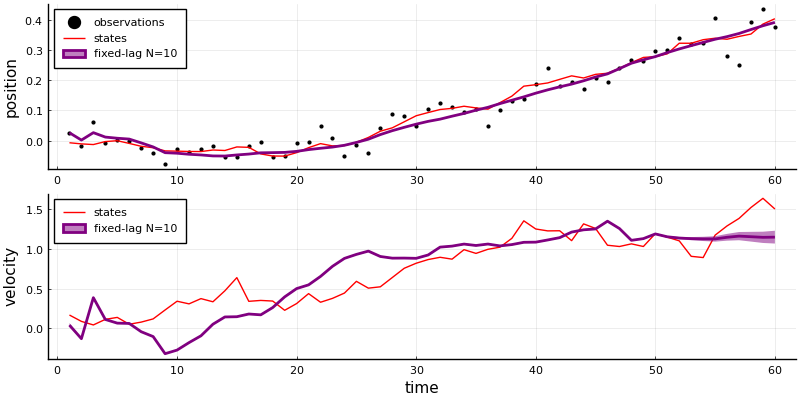

In [173]:
p101 = scatter(1:T, observations, markersize=2, color="black", label="observations")
plot!(1:T, states[1,:], lw=1, color="red", label="states", ylabel="position", legend=:topleft)
plot!(1:T, mk[1,:], ribbon=Pk[1,1,:], lw=2, color="purple", label="fixed-lag N=10")

p102 = plot(1:T, states[2,:], lw=1, color="red", label="states", xlabel="time", ylabel="velocity", legend=:topleft)
plot!(1:T, mk[2,:], ribbon=Pk[2,2,:], lw=2, color="purple", label="fixed-lag N=10")

plot(p101,p102, layout=(2,1), size=(800,400))

In [ ]:
# Fixed-interval Rauch-Tung-Striebel smoother
msk,Psk = fixedlag_rts_smoother(observations, A,C,Q,R,x0);

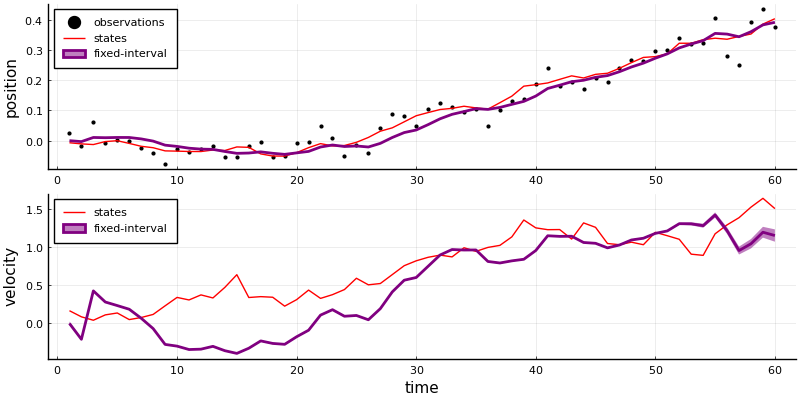

In [172]:
p101 = scatter(1:T, observations, markersize=2, color="black", label="observations")
plot!(1:T, states[1,:], lw=1, color="red", label="states", ylabel="position", legend=:topleft)
plot!(1:T, msk[1,:], ribbon=Pk[1,1,:], lw=2, color="purple", label="fixed-interval")

p102 = plot(1:T, states[2,:], lw=1, color="red", label="states", xlabel="time", ylabel="velocity", legend=:topleft)
plot!(1:T, msk[2,:], ribbon=Pk[2,2,:], lw=2, color="purple", label="fixed-interval")

plot(p101,p102, layout=(2,1), size=(800,400))

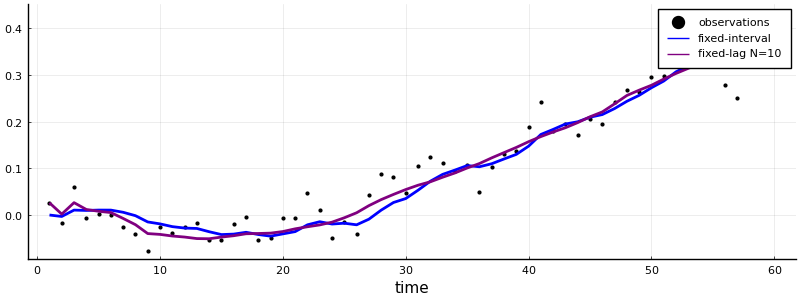

In [170]:
# Compare both
scatter(1:T, observations, markersize=2, color="black", label="observations", xlabel="time", size=(800,300))
plot!(1:T, msk[1,:], lw=2, color="blue", label="fixed-interval")
plot!(1:T, mk[1,:], lw=2, color="purple", label="fixed-lag N=10")